# Logistic Regression

In [1]:
from sklearn.datasets import load_iris, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from IPython.display import Markdown

import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
N_SEED = 19
TOP_K = 5
VERBOSE = 1
N_JOBS = 4

np.random.seed(N_SEED)
rnd.seed(N_SEED)
COLOR_MAP = "Spectral"

In [3]:
def plot_features(x, target):
    _, col = x.shape
    font = {
        "color": "darkblue",
        "size": 11
    }
    for i in range(col):
        plt.scatter(x[:, i], target, color="red", s=4,)
        plt.xlabel("X: {i}".format(i=i), fontdict=font)
        plt.ylabel("Target", fontdict=font)
        ax = plt.gca()
        ax.spines["bottom"].set_color("brown")
        ax.spines["top"].set_color("white")
        ax.spines["left"].set_color("brown")
        ax.spines["right"].set_color("white")
        ax.tick_params(axis="x", colors="brown")
        ax.tick_params(axis="y", colors="brown")
        plt.show();

        plt.hist(x[:, i], color="green", linewidth=0.5, edgecolor="red")
        plt.xlabel("X: {i}".format(i=i), fontdict=font)
        plt.ylabel("Population", fontdict=font)
        ax = plt.gca()
        ax.spines["bottom"].set_color("brown")
        ax.spines["top"].set_color("white")
        ax.spines["left"].set_color("brown")
        ax.spines["right"].set_color("white")
        ax.tick_params(axis="x", colors="brown")
        ax.tick_params(axis="y", colors="brown")
        plt.show();


def plot_class_dist(target):
    unique, counts = np.unique(target, return_counts=True)
    font = {
        "color": "darkblue",
        "size": 11
    }

    plt.barh(unique, counts, color="darkblue", linewidth=0.5, edgecolor="red")
    plt.xlabel("Class", fontdict=font)
    plt.ylabel("Size", fontdict=font)
    ax = plt.gca()
    ax.spines["bottom"].set_color("brown")
    ax.spines["top"].set_color("white")
    ax.spines["left"].set_color("brown")
    ax.spines["right"].set_color("white")
    ax.tick_params(axis="x", colors="brown")
    ax.tick_params(axis="y", colors="brown")
    plt.show();

## Self-created dataset

In [4]:
X = np.array([[1.0], [2.0], [3.0], [4.5], [5.5]])
y = np.array([0.0, 0.0, 0.0, 1.0, 1.0])

X_test = np.array([[3], [5.1]])
y_test = np.array([[0.0], [1.0]])

### EDA

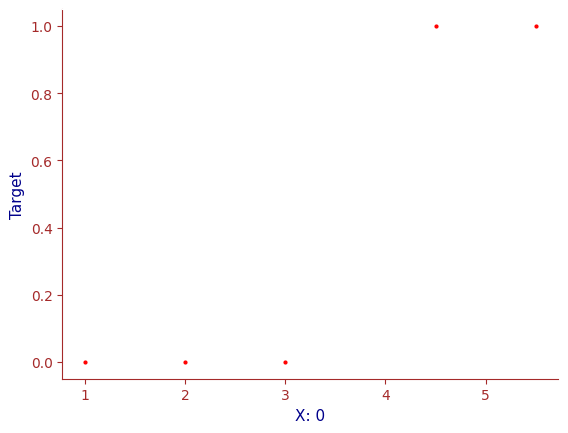

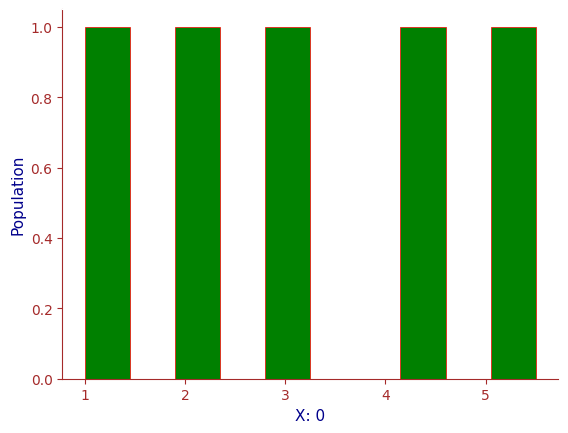

In [5]:
plot_features(X, y)

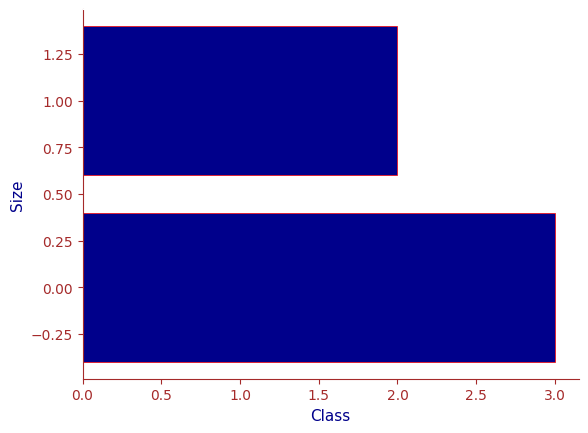

In [6]:
plot_class_dist(y)

### Create a model and fit data into the model

In [7]:
lgr_model = LogisticRegression(
    random_state=N_SEED,
    n_jobs = N_JOBS,
    verbose=VERBOSE,
).fit(X, y)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  4.00000D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      9     12      1     0     0   6.095D-06   3.297D-01
  F =  0.32974173836683396     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


### Predict

In [8]:
y_lgr_pred = lgr_model.predict(np.array(X_test))
y_lgr_pred

array([0., 1.])

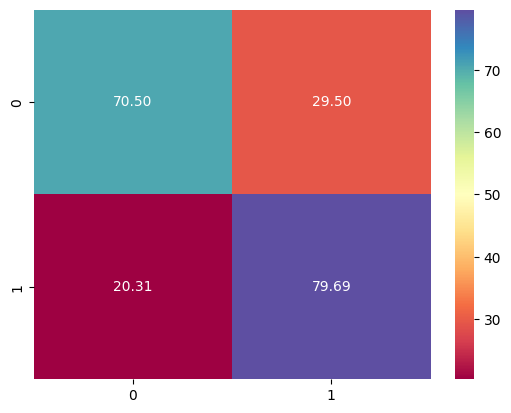

In [9]:
y_lgr_p = lgr_model.predict_proba(X_test) * 100
sns.heatmap(y_lgr_p, annot=True, cmap=COLOR_MAP, fmt=".2f");

## Iris dataset (classification problem)

In [10]:
X1, y1 = load_iris(return_X_y=True)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=N_SEED)

### EDA

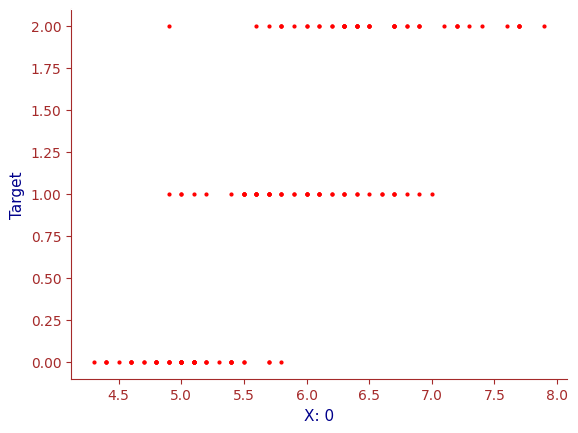

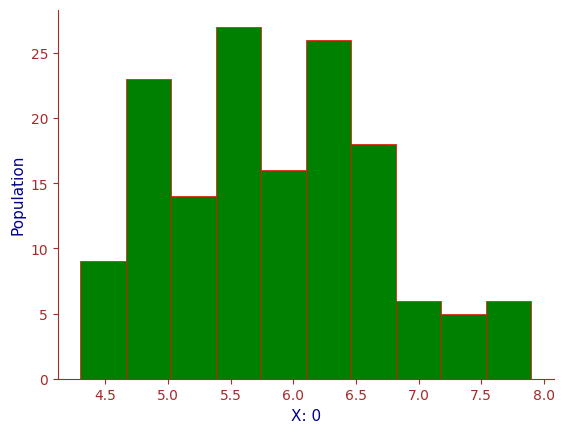

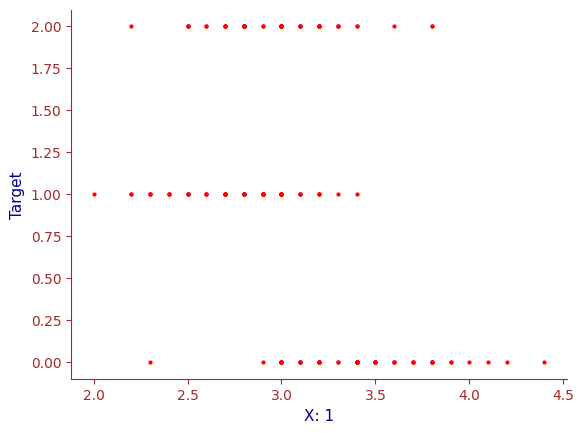

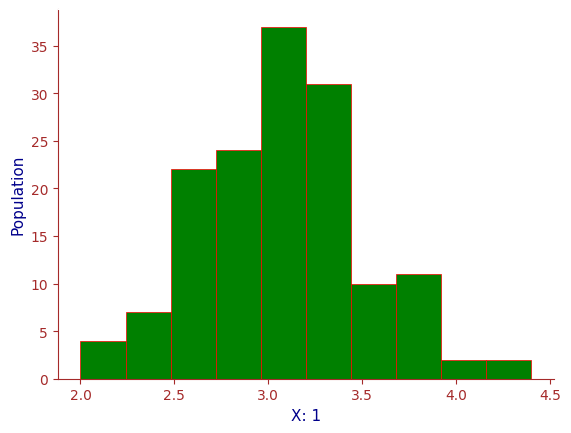

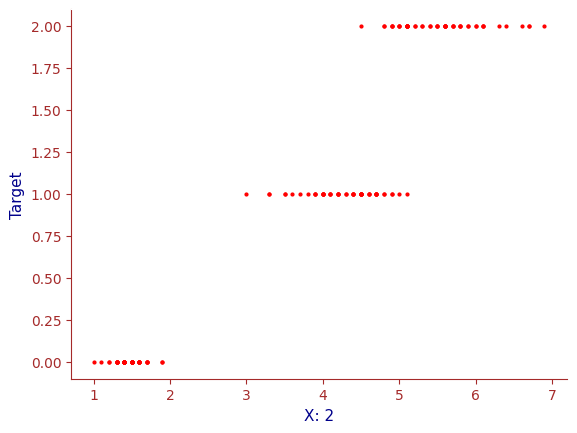

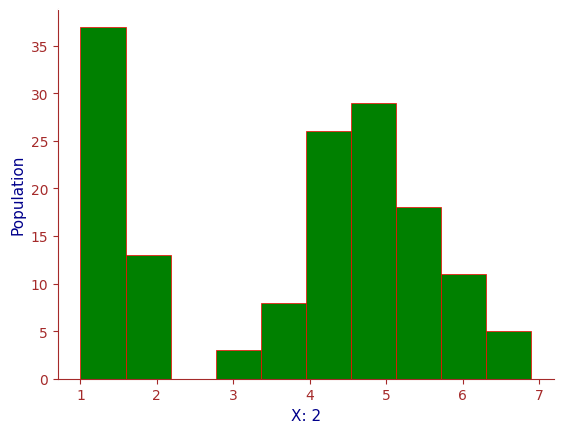

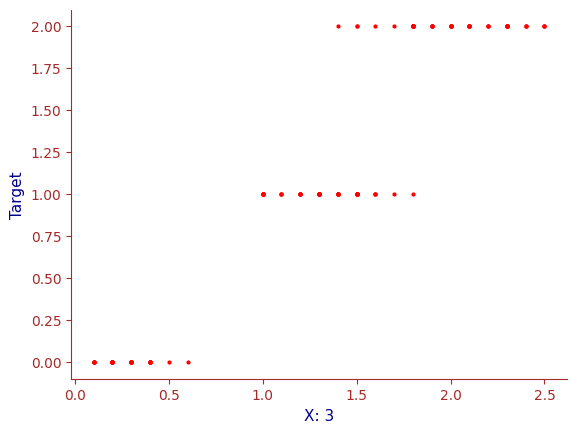

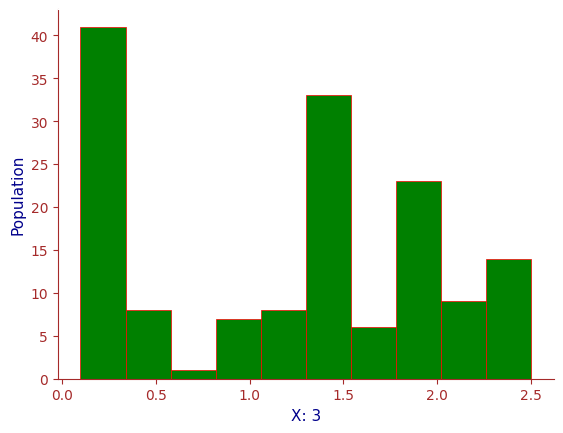

In [11]:
plot_features(X1, y1)

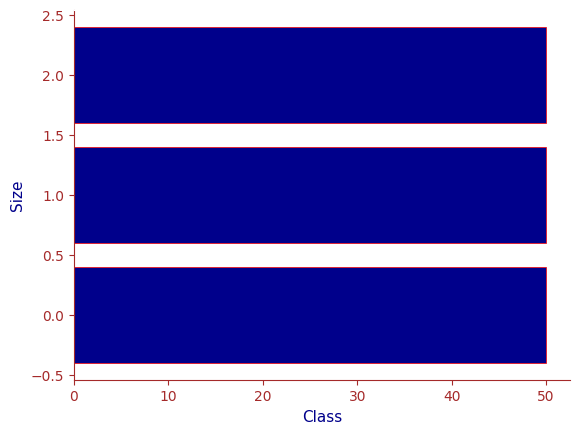

In [12]:
plot_class_dist(y1)

### Create a model and fit data into the model

In [13]:
lgr_model1 = LogisticRegression(
    random_state=N_SEED,
    max_iter=150,
    n_jobs = N_JOBS,
    verbose=VERBOSE,
).fit(X1_train, y1_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09861D+00    |proj g|=  7.73611D-01

At iterate   50    f=  2.25382D-01    |proj g|=  1.48213D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     78     91      1     0     0   8.024D-05   2.179D-01
  F =  0.21791582318042346     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


### Predict

In [14]:
y1_lgr_pred = lgr_model1.predict(X1_test)
y1_lgr_pred[:TOP_K]

array([0, 2, 1, 1, 0])

In [15]:
y1_test[:TOP_K]

array([0, 2, 1, 1, 0])

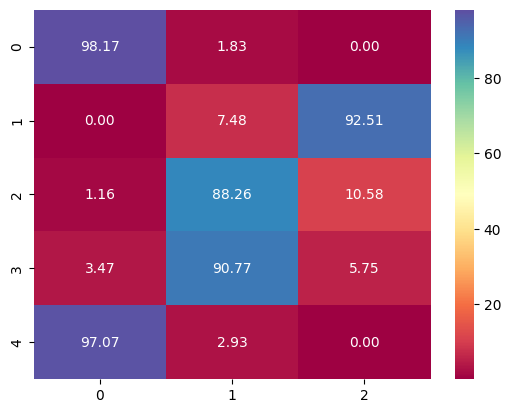

In [16]:
y1_lgr_p = lgr_model1.predict_proba(X1_test) * 100
y1_lgr_p[:TOP_K]
sns.heatmap(y1_lgr_p[:TOP_K], annot=True, cmap=COLOR_MAP, fmt=".2f");

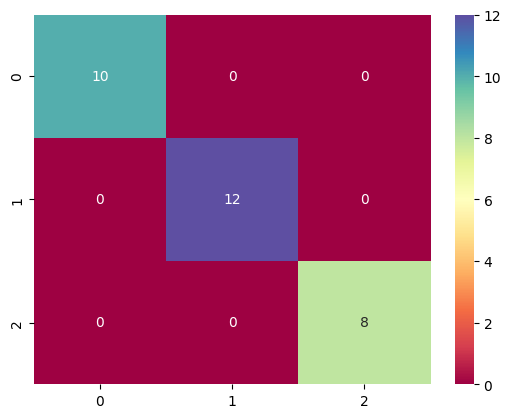

In [17]:
cm1_lgr = confusion_matrix(y_true=y1_test, y_pred=y1_lgr_pred)
sns.heatmap(cm1_lgr, annot=True, cmap=COLOR_MAP, fmt=".0f");

In [18]:
Markdown(classification_report(y_true=y1_test, y_pred=y1_lgr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30
